# EDA and Regression

## Load Packages

In [36]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

In [3]:
df = pd.read_csv('../data/StudentsPerformance.csv', encoding='utf-8-sig')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Basic Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Pandas Profiling

In [6]:
df.profile_report()

In [7]:
numeric_cols = df.describe().columns.to_list()
numeric_cols

['math score', 'reading score', 'writing score']

In [8]:
categorical_cols = [col for col in df.columns if col not in numeric_cols]
categorical_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

## Visualization

### Numeric

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

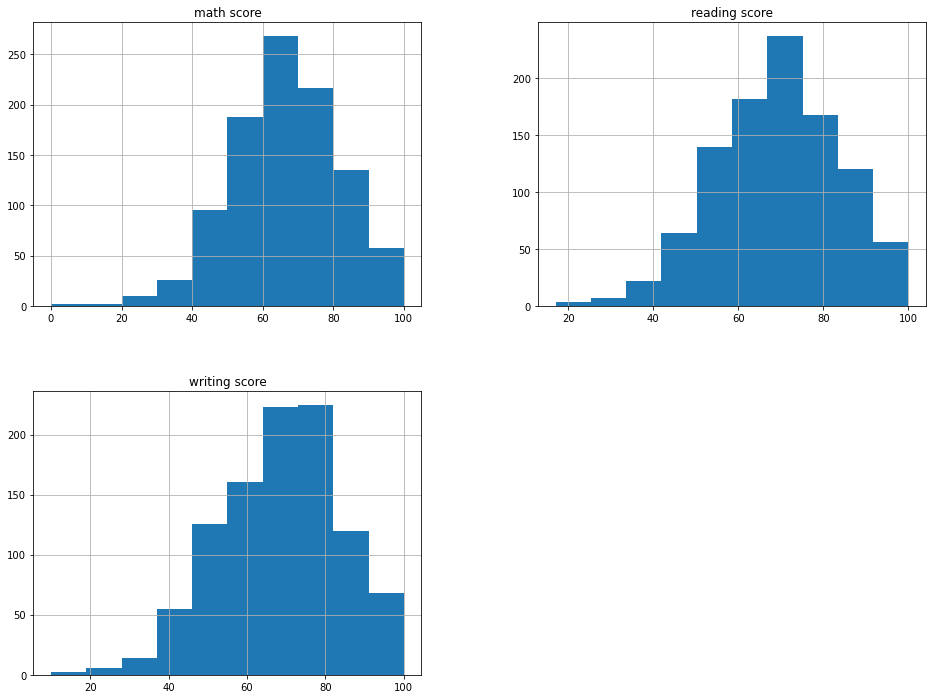

In [9]:
df[numeric_cols].hist(figsize=(16, 12))

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\anaconda3\lib\s

<AxesSubplot:title={'center':'Reading Score'}, xlabel='reading score'>

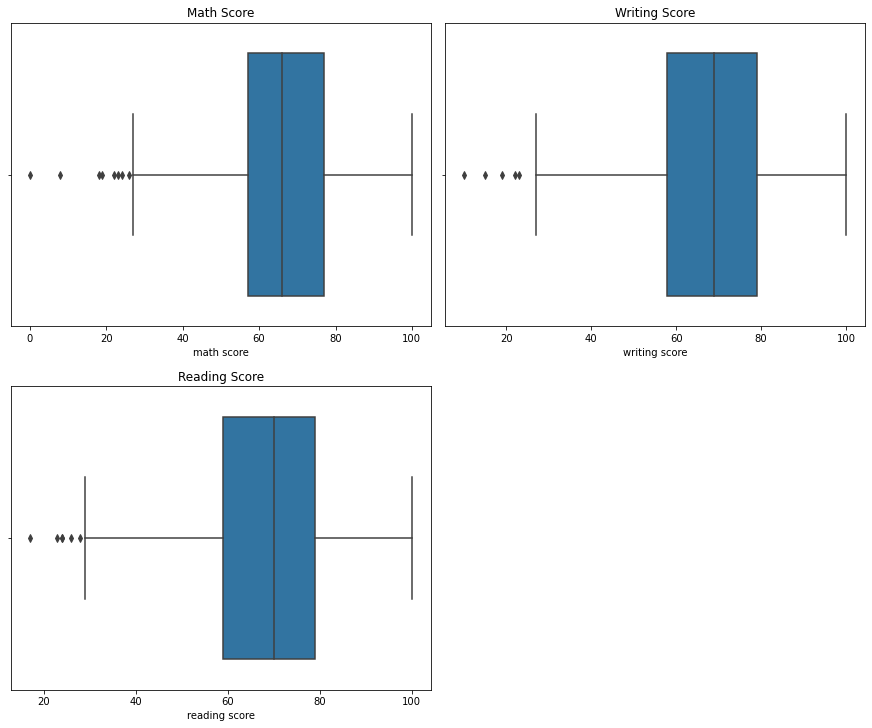

In [10]:
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

ax11 = fig.add_subplot(grid[0, :2])
ax11.set_title('Math Score')
sns.boxplot(df['math score'], orient='v')

ax12 = fig.add_subplot(grid[0, 2:4])
ax12.set_title('Writing Score')
sns.boxplot(df['writing score'], orient='v')

ax21 = fig.add_subplot(grid[1, :2])
ax21.set_title('Reading Score')
sns.boxplot(df['reading score'], orient='v')

### Feature - Target Correlation

<AxesSubplot:xlabel='gender', ylabel='math score'>

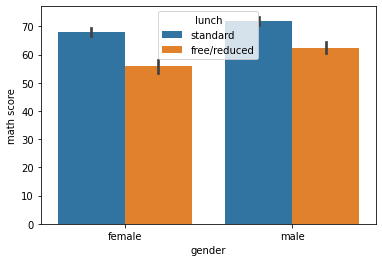

In [33]:
sns.barplot(x="gender", y="math score", hue="lunch", data=df)

<AxesSubplot:xlabel='gender', ylabel='math score'>

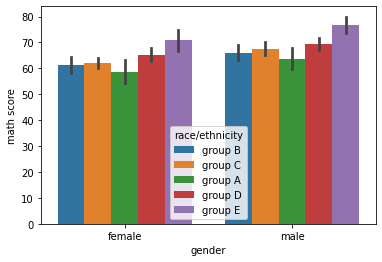

In [29]:
sns.barplot(x="gender", y="math score", hue="race/ethnicity", data=df)

<AxesSubplot:xlabel='gender', ylabel='math score'>

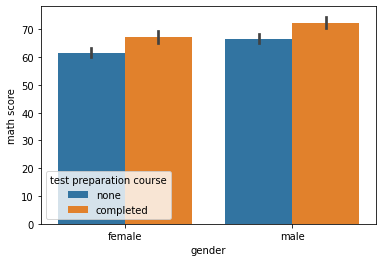

In [32]:
sns.barplot(x="gender", y="math score", hue="test preparation course", data=df)

## Hadling Outlier

In [11]:
def remove_outlier(df_tmp, col):
    outlier_column_data = df_tmp[col]
    # value at 25%
    quan_25 = np.percentile(outlier_column_data, 25)
    # value at 75%
    quan_75 = np.percentile(outlier_column_data, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr * 1.5
    max_limit = quan_75 + iqr
    min_limit = quan_25 - iqr
    outlier_index = outlier_column_data[(outlier_column_data < min_limit) | (outlier_column_data > max_limit)].index
    print(outlier_index)
    print('Outlier Index Length : ', len(outlier_index))
    
    df_tmp.drop(outlier_index, axis=0, inplace=True)
    return df_tmp

In [12]:
df_copy = df.copy()

In [13]:
df_copy = remove_outlier(df_copy, 'math score')
df_copy = remove_outlier(df_copy, 'writing score')
df_copy = remove_outlier(df_copy, 'reading score')
df_copy.shape

Int64Index([17, 59, 145, 338, 466, 787, 842, 980], dtype='int64')
Outlier Index Length :  8
Int64Index([76, 327, 596], dtype='int64')
Outlier Index Length :  3
Int64Index([211, 601, 896], dtype='int64')
Outlier Index Length :  3


(986, 8)

In [14]:
df_copy.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
df_copy['race/ethnicity'].value_counts()

group C    315
group D    261
group B    183
group E    139
group A     88
Name: race/ethnicity, dtype: int64

## Categorical Features Encode

In [38]:
# 1) LabelEncoder
def encode_features(df_train):
    for feature in df_train.columns.to_list():
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

df_encoded = encode_features(df_copy)
df_encoded.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,42,36,42
1,0,2,4,1,0,39,54,56
2,0,1,3,1,1,60,59,61
3,1,0,0,0,1,17,21,12
4,1,2,4,1,1,46,42,43


## Train Split

In [43]:
X_all = df_encoded.drop(['math score'], axis=1)
y_all = df_encoded['math score']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

## Regression

### XGB Regressor

In [95]:
#### from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# prediction
xg_model = XGBRegressor(max_depth=2)
xg_model.fit(X_train, y_train)
preds = xg_model.predict(X_test)
mean_squared_error(preds, y_test)

33.57090723927335

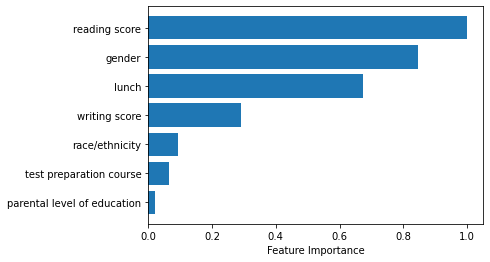

In [96]:
# feature importance
feature_importance = xg_model.feature_importances_
feature_importance = feature_importance / feature_importance.max()

sorted_idx = np.argsort(feature_importance)
bar_pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(bar_pos, feature_importance[sorted_idx], align='center')
plt.yticks(bar_pos, X_all.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

### Linear Regression

In [76]:
# prediction
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
preds = linear_model.predict(X_test)
mean_squared_error(preds, y_test)

32.494068189440746

### Random Forest Regressor

In [69]:
# prediction
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
mean_squared_error(preds, y_test)

37.337297278338944

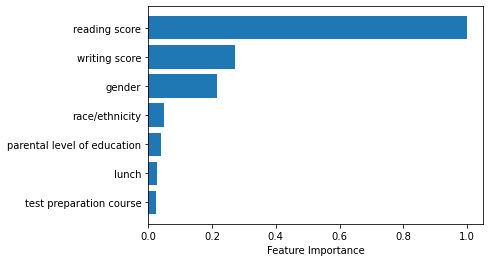

In [73]:
# feature importance
feature_importance = rf_model.feature_importances_
feature_importance = feature_importance / feature_importance.max()

sorted_idx = np.argsort(feature_importance)
bar_pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(bar_pos, feature_importance[sorted_idx], align='center')
plt.yticks(bar_pos, X_all.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.show()